In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, kendalltau
import numpy as np

# Data Analysis

### Awards Player

In [6]:
awards_players_dataSet = pd.read_csv('../Other/basketballPlayoffs/awards_players.csv')
#print(awards_players_dataSet.info())
columns_to_remove = ['lgID']
awards_players_new = awards_players_dataSet.drop(columns=columns_to_remove)

awards_players_new = awards_players_new[(awards_players_new['award'] != 'Kim Perrot Sportsmanship Award') & (awards_players_new['award'] != 'Sixth Woman of the Year') ]

awards_players_new.to_csv('newDataset/awards_players_cleaned.csv', index=False)

### Coaches

In [7]:
coaches_dataSet = pd.read_csv('../Other/basketballPlayoffs/coaches.csv')
#print(coaches_dataSet.info())

#Check if stint could be removed
columns_to_remove = ['lgID']
coaches_new = coaches_dataSet.drop(columns=columns_to_remove)

coaches_new.to_csv('newDataset/coaches_cleaned.csv', index=False)

### Players

In [8]:
players_dataSet = pd.read_csv('../Other/basketballPlayoffs/players.csv')
#print(players_dataSet.info())

#Maybe everything is usless
columns_to_remove = ['firstseason', 'lastseason', 'college', 'collegeOther', 'deathDate']
players_dataSet_new = players_dataSet.drop(columns=columns_to_remove)

players_dataSet.to_csv('newDataset/players_cleaned.csv', index=False)

### Players Teams

In [9]:
players_teams_dataSet = pd.read_csv('../Other/basketballPlayoffs/players_teams.csv')
#print(players_teams_dataSet.info())

#Check if something else could be removed
columns_to_remove = ['lgID', 'turnovers']
players_teams_new = players_teams_dataSet.drop(columns=columns_to_remove)

players_teams_new.to_csv('newDataset/players_teams_cleaned.csv', index=False)

### Series Post

In [10]:
series_post_dataSet = pd.read_csv('../Other/basketballPlayoffs/series_post.csv')
#print(series_post_dataSet.info())

#Check if something else could be removed
columns_to_remove = ['lgIDWinner', 'lgIDLoser']
series_post_new = series_post_dataSet.drop(columns=columns_to_remove)

series_post_new.to_csv('newDataset/series_post_cleaned.csv', index=False)

### Teams

In [11]:
teams_dataSet = pd.read_csv('../Other/basketballPlayoffs/teams.csv')
#print(teams_dataSet.info()) 
columns_to_remove = ['lgID','divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB', 'homeW','homeL', 'awayW', 'awayL', 'confW','confL', 'min', 'attend', 'arena'] 
teams_new = teams_dataSet.drop(columns=columns_to_remove)

In [12]:
# two subset: east and west
teams_EA = teams_new[teams_new['confID'] == 'EA']
teams_WE = teams_new[teams_new['confID'] == 'WE']

# Salva i due dataset filtrati in file CSV separati
teams_EA.to_csv('newDataset/teams_EA_cleaned.csv', index=False)
teams_WE.to_csv('newDataset/teams_WE_cleaned.csv', index=False)

In [13]:
#add the column winrate
df_EA = pd.read_csv('newDataset/teams_EA_cleaned.csv')
df_WE = pd.read_csv('newDataset/teams_WE_cleaned.csv')

df_EA['winrate'] =  df_EA['won'] / df_EA['GP'] * 100
df_EA.to_csv('newDataset/teams_EA_cleaned.csv', index=False)

df_WE['winrate'] =  df_WE['won'] / df_WE['GP'] * 100
df_WE.to_csv('newDataset/teams_WE_cleaned.csv', index=False)


remove = ['won', 'lost']
df_EA = df_EA.drop(columns=remove)
df_EA.to_csv('newDataset/teams_EA_cleaned.csv', index=False)

df_WE = df_WE.drop(columns=remove)
df_WE.to_csv('newDataset/teams_WE_cleaned.csv', index=False)

In [14]:
## EAST

#mismatches goals made, ordered by year
df_teams = pd.read_csv('newDataset/teams_EA_cleaned.csv')
df_players = pd.read_csv('newDataset/players_teams_cleaned.csv')

# sum  of fieldGoals group by team from "players_teams"
sum_fieldGoals = df_players.groupby(['tmID', 'year'])['fgMade'].sum().reset_index()
sum_fieldGoals.rename(columns={'fgMade': 'sum_fgMadePlayer'}, inplace=True)
# add sum to teams to merge
df_compare = pd.merge(df_teams, sum_fieldGoals, on=['tmID', 'year'], how='left')

# difference between total on teams and total on sum players
df_compare['diff_fieldGoals'] = df_compare['o_fgm'] - df_compare['sum_fgMadePlayer']
# find mismatch in rows
mismatch = df_compare[df_compare['diff_fieldGoals'] != 0]

# update 'o_fgm' only if is different
df_compare.loc[df_compare['diff_fieldGoals'] != 0, 'o_fgm'] = df_compare['sum_fgMadePlayer']
df_teams_updated = df_compare.drop(columns=['sum_fgMadePlayer', 'diff_fieldGoals'])
df_teams_updated.to_csv('newDataset/teams_EA_cleaned.csv', index=False)

if not mismatch.empty:
    first_year = mismatch['year'].min()
    # new dataframe for all the mismatch
    all_mismatches = pd.DataFrame()
    # for all the 10 years
    for year in range(first_year, first_year + 10):
        mismatch_specific_year = mismatch[mismatch['year'] == year]
        all_mismatches = pd.concat([all_mismatches, mismatch_specific_year], ignore_index=True)

# save all in .csv
all_mismatches.to_csv('allmismatch_EA_fieldGoals.csv', index=False)

In [15]:
## EAST

#mismatches free throws made, ordered by year
df_teams = pd.read_csv('newDataset/teams_EA_cleaned.csv')
df_players = pd.read_csv('newDataset/players_teams_cleaned.csv')

# sum  of fieldGoals group by team from "players_teams"
sum_freeThrows = df_players.groupby(['tmID', 'year'])['ftMade'].sum().reset_index()
sum_freeThrows.rename(columns={'ftMade': 'sum_ftMadePlayer'}, inplace=True)
# add sum to teams to merge
df_compare = pd.merge(df_teams, sum_freeThrows, on=['tmID', 'year'], how='left')

# difference between total on teams and total on sum players
df_compare['diff_freeThrows'] = df_compare['o_ftm'] - df_compare['sum_ftMadePlayer']
# find mismatch in rows
mismatch = df_compare[df_compare['diff_freeThrows'] != 0]

# update 'o_ftm' only if is different
df_compare.loc[df_compare['diff_freeThrows'] != 0, 'o_ftm'] = df_compare['sum_ftMadePlayer']
df_teams_updated = df_compare.drop(columns=['sum_ftMadePlayer', 'diff_freeThrows'])
df_teams_updated.to_csv('newDataset/teams_EA_cleaned.csv', index=False)

if not mismatch.empty:
    first_year = mismatch['year'].min()
    # new dataframe for all the mismatch
    all_mismatches = pd.DataFrame()
    # for all the 10 years
    for year in range(first_year, first_year + 10):
        mismatch_specific_year = mismatch[mismatch['year'] == year]
        all_mismatches = pd.concat([all_mismatches, mismatch_specific_year], ignore_index=True)

# save all in .csv
all_mismatches.to_csv('allmismatch_EA_freeThrows.csv', index=False)

In [16]:
## EAST

#mismatches three-pointers made, ordered by year
df_teams = pd.read_csv('newDataset/teams_EA_cleaned.csv')
df_players = pd.read_csv('newDataset/players_teams_cleaned.csv')

# sum  of fieldGoals group by team from "players_teams"
sum_freeThrows = df_players.groupby(['tmID', 'year'])['threeMade'].sum().reset_index()
sum_freeThrows.rename(columns={'threeMade': 'sum_threeMadePlayer'}, inplace=True)
# add sum to teams to merge
df_compare = pd.merge(df_teams, sum_freeThrows, on=['tmID', 'year'], how='left')

# difference between total on teams and total on sum players
df_compare['diff_threePointers'] = df_compare['o_3pm'] - df_compare['sum_threeMadePlayer']
# find mismatch in rows
mismatch = df_compare[df_compare['diff_threePointers'] != 0]

# update 'o_3pm' only if is different
df_compare.loc[df_compare['diff_threePointers'] != 0, 'o_3pm'] = df_compare['sum_threeMadePlayer']
df_teams_updated = df_compare.drop(columns=['sum_threeMadePlayer', 'diff_threePointers'])
df_teams_updated.to_csv('newDataset/teams_EA_cleaned.csv', index=False)

if not mismatch.empty:
    first_year = mismatch['year'].min()
    # new dataframe for all the mismatch
    all_mismatches = pd.DataFrame()
    # for all the 10 years
    for year in range(first_year, first_year + 10):
        mismatch_specific_year = mismatch[mismatch['year'] == year]
        all_mismatches = pd.concat([all_mismatches, mismatch_specific_year], ignore_index=True)

# save all in .csv
all_mismatches.to_csv('allmismatch_EA_threePointers.csv', index=False)

In [17]:
## WEST

#mismatches goals made, ordered by year
df_teams = pd.read_csv('newDataset/teams_WE_cleaned.csv')
df_players = pd.read_csv('newDataset/players_teams_cleaned.csv')

# sum  of fieldGoals group by team from "players_teams"
sum_fieldGoals = df_players.groupby(['tmID', 'year'])['fgMade'].sum().reset_index()
sum_fieldGoals.rename(columns={'fgMade': 'sum_fgMadePlayer'}, inplace=True)
# add sum to teams to merge
df_compare = pd.merge(df_teams, sum_fieldGoals, on=['tmID', 'year'], how='left')

# difference between total on teams and total on sum players
df_compare['diff_fieldGoals'] = df_compare['o_fgm'] - df_compare['sum_fgMadePlayer']
# find mismatch in rows
mismatch = df_compare[df_compare['diff_fieldGoals'] != 0]

# update 'o_fgm' only if is different
df_compare.loc[df_compare['diff_fieldGoals'] != 0, 'o_fgm'] = df_compare['sum_fgMadePlayer']
df_teams_updated = df_compare.drop(columns=['sum_fgMadePlayer', 'diff_fieldGoals'])
df_teams_updated.to_csv('newDataset/teams_WE_cleaned.csv', index=False)

if not mismatch.empty:
    first_year = mismatch['year'].min()
    # new dataframe for all the mismatch
    all_mismatches = pd.DataFrame()
    # for all the 10 years
    for year in range(first_year, first_year + 10):
        mismatch_specific_year = mismatch[mismatch['year'] == year]
        all_mismatches = pd.concat([all_mismatches, mismatch_specific_year], ignore_index=True)
# save all in .csv
all_mismatches.to_csv('allmismatch_WE_fieldGoals.csv', index=False)

In [18]:
## WEST

#mismatches free throws made, ordered by year
df_teams = pd.read_csv('newDataset/teams_WE_cleaned.csv')
df_players = pd.read_csv('newDataset/players_teams_cleaned.csv')

# sum  of fieldGoals group by team from "players_teams"
sum_freeThrows = df_players.groupby(['tmID', 'year'])['ftMade'].sum().reset_index()
sum_freeThrows.rename(columns={'ftMade': 'sum_ftMadePlayer'}, inplace=True)
# add sum to teams to merge
df_compare = pd.merge(df_teams, sum_freeThrows, on=['tmID', 'year'], how='left')

# difference between total on teams and total on sum players
df_compare['diff_freeThrows'] = df_compare['o_ftm'] - df_compare['sum_ftMadePlayer']
# find mismatch in rows
mismatch = df_compare[df_compare['diff_freeThrows'] != 0]

# update 'o_ftm' only if is different
df_compare.loc[df_compare['diff_freeThrows'] != 0, 'o_ftm'] = df_compare['sum_ftMadePlayer']
df_teams_updated = df_compare.drop(columns=['sum_ftMadePlayer', 'diff_freeThrows'])
df_teams_updated.to_csv('newDataset/teams_WE_cleaned.csv', index=False)

if not mismatch.empty:
    first_year = mismatch['year'].min()
    # new dataframe for all the mismatch
    all_mismatches = pd.DataFrame()
    # for all the 10 years
    for year in range(first_year, first_year + 10):
        mismatch_specific_year = mismatch[mismatch['year'] == year]
        all_mismatches = pd.concat([all_mismatches, mismatch_specific_year], ignore_index=True)

# save all in .csv
all_mismatches.to_csv('allmismatch_WE_freeThrows.csv', index=False)

In [19]:
## WEST

#mismatches three-pointers made, ordered by year
df_teams = pd.read_csv('newDataset/teams_WE_cleaned.csv')
df_players = pd.read_csv('newDataset/players_teams_cleaned.csv')

# sum  of fieldGoals group by team from "players_teams"
sum_freeThrows = df_players.groupby(['tmID', 'year'])['threeMade'].sum().reset_index()
sum_freeThrows.rename(columns={'threeMade': 'sum_threeMadePlayer'}, inplace=True)
# add sum to teams to merge
df_compare = pd.merge(df_teams, sum_freeThrows, on=['tmID', 'year'], how='left')

# difference between total on teams and total on sum players
df_compare['diff_threePointers'] = df_compare['o_3pm'] - df_compare['sum_threeMadePlayer']
# find mismatch in rows
mismatch = df_compare[df_compare['diff_threePointers'] != 0]

# update 'o_3pm' only if is different
df_compare.loc[df_compare['diff_threePointers'] != 0, 'o_3pm'] = df_compare['sum_threeMadePlayer']
df_teams_updated = df_compare.drop(columns=['sum_threeMadePlayer', 'diff_threePointers'])
df_teams_updated.to_csv('newDataset/teams_WE_cleaned.csv', index=False)

if not mismatch.empty:
    first_year = mismatch['year'].min()
    # new dataframe for all the mismatch
    all_mismatches = pd.DataFrame()
    # for all the 10 years
    for year in range(first_year, first_year + 10):
        mismatch_specific_year = mismatch[mismatch['year'] == year]
        all_mismatches = pd.concat([all_mismatches, mismatch_specific_year], ignore_index=True)

# save all in .csv
all_mismatches.to_csv('allmismatch_WE_threePointers.csv', index=False)

### Teams Posts

In [20]:
# Nothing to do for now
teams_post_dataSet = pd.read_csv('../Other/basketballPlayoffs/teams_post.csv')
columns_to_remove = [] 
teams_post_new = teams_post_dataSet.drop(columns=columns_to_remove)
teams_post_new.to_csv('newDataset/teams_post.csv', index=False)

## Correlations


Results for each award:
                                    award  Rank_1_4_Percentage
0                      Rookie of the Year            52.436195
1        WNBA Finals Most Valuable Player            63.395225
2                    Most Improved Player            58.941606
3                    WNBA All-Decade Team            66.414141
4            Defensive Player of the Year            70.611702
5      All-Star Game Most Valuable Player            76.076555
6                    Most Valuable Player            73.698264
7  WNBA All Decade Team Honorable Mention            66.666667
8                Kim Perrot Sportsmanship            80.000000
9                       Coach of the Year            75.000000


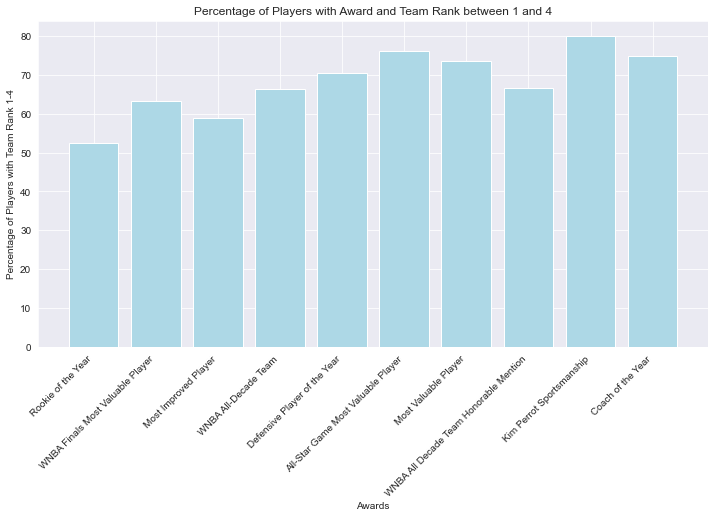

In [21]:
awards_players_df = pd.read_csv('newDataset/awards_players_cleaned.csv')
players_team_df = pd.read_csv('newDataset/players_teams_cleaned.csv')
teams_df = pd.read_csv('../Other/basketballPlayoffs/teams.csv')

merged_teams = pd.merge(players_team_df, teams_df, on='tmID', how='inner')
final_df = pd.merge(merged_teams, awards_players_df, on=['playerID'], how='inner')


awards_array = final_df['award'].unique()
results = []

for award in awards_array:
    award_df = final_df[final_df['award'] == award]

    rank_1_4_count = award_df[(award_df['rank'] >= 1) & (award_df['rank'] <= 4)].shape[0]
    total_count = award_df.shape[0]

    if total_count > 0:
        rank_1_4_percentage = (rank_1_4_count / total_count) * 100
    else:
        rank_1_4_percentage = 0

    results.append({'award': award, 'Rank_1_4_Percentage': rank_1_4_percentage})

results_df = pd.DataFrame(results)

print("\nResults for each award:")
print(results_df)

# 9. Visualizzazione della percentuale in un grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(results_df['award'], results_df['Rank_1_4_Percentage'], color='lightblue')
plt.title('Percentage of Players with Award and Team Rank between 1 and 4')
plt.xlabel('Awards')
plt.ylabel('Percentage of Players with Team Rank 1-4')
plt.xticks(rotation=45, ha='right')
plt.show()